In [54]:
import numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot

In [64]:
start_date = "2016-01-01"
end_date = "2016-12-31"
df = pd.DataFrame(index=pd.date_range(start_date, end_date)) # 日付の行列を生成・格納
# print(df)

In [65]:
# 日経255のデータを読み込んでjoinする
csv = pd.read_csv("N225.csv", index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"])
df = df.join(csv)

               Adj Close
2016-01-04  18450.980469
2016-01-05  18374.000000
2016-01-06  18191.320313
2016-01-07  17767.339844
2016-01-08  17697.960938


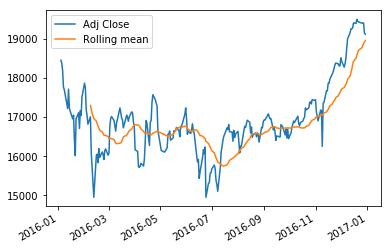

In [60]:
# 終値がない日（市場が休みの日）を取り除く
df = df.dropna() #Drop NaN
print(df.head()) # 頭の5つだけ取得

# 25日移動平均の計算
rolling = df.rolling(window=25) # 25日前までのindexをそれぞれ取得する
rm = rolling.mean() # 平均

# プロット
ax = df.plot() # 終値描画
rm.columns = ["Rolling mean"] # カラム指定
rm.plot(ax=ax) # 移動平均線描画